# Batch 2 Group 5 activity - Business analytics on Organics dataset

# Business Objective

In [906]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [907]:
# Reading the dataset to the python environment

data = pd.read_csv('organics.csv')
data.head(10)

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10,76,1,0.00%,4,0,0,16000.00
1,620,U,Midlands,Gold,35.0,D,Wales & West,4,49,1,0.00%,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0,0.01
5,2771,U,North,Platinum,28.0,D,N West,9,72,1,0.00%,3,0,0,20759.81
6,3131,F,Midlands,Tin,3.0,A,East,11,74,1,0.00%,8,0,0,0.01
7,3328,M,North,Tin,32.0,D,N East,13,62,1,0.00%,5,0,0,0.01
8,4529,M,Midlands,Silver,49.0,F,East,10,62,1,0.00%,3,0,0,2038.76
9,5886,F,NaN,Gold,49.0,F,NaN,14,43,1,0.00%,1,1,1,6000.00


In [908]:
# Quick checks on the dataset

In [909]:
# to display the shape of the dataset
data.shape

(22223, 15)

In [910]:
# to display all the column names in the dataset
data.columns

Index(['Customer Loyalty ID', 'Gender', 'Geographic Region', 'Loyalty Status',
       'Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level',
       'Television Region', 'Affluence Grade', 'Age', 'Frequency',
       'Frequency Percent', 'Loyalty Card Tenure', 'Organics Purchase Count',
       'Organics Purchase Indicator', 'Total Spend'],
      dtype='object')

In [911]:
# to check for the type of values in different attributes
data.dtypes

Customer Loyalty ID               int64
Gender                           object
Geographic Region                object
Loyalty Status                   object
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level     object
Television Region                object
Affluence Grade                  object
Age                              object
Frequency                         int64
Frequency Percent                object
Loyalty Card Tenure              object
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

In [912]:
# to display stats about data
data.describe()

,Customer Loyalty ID,Neigborhood Cluster-55 Level,Frequency,Organics Purchase Count,Organics Purchase Indicator,Total Spend
count,2.222300e+04,21549.000000,22223.0,22223.000000,22223.000000,22223.000000
mean,2.605540e+07,27.193652,1.0,0.294740,0.247716,4420.590041
std,1.507497e+07,15.751547,0.0,0.562831,0.431696,7559.047522
min,1.400000e+02,1.000000,1.0,0.000000,0.000000,0.010000
25%,1.169402e+07,14.000000,1.0,0.000000,0.000000,0.010000
50%,2.874879e+07,27.000000,1.0,0.000000,0.000000,2000.000000
75%,3.745402e+07,38.000000,1.0,0.000000,0.000000,6000.000000
max,5.285647e+07,55.000000,1.0,3.000000,1.000000,296313.850000


In [913]:
# basic info about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Loyalty ID           22223 non-null  int64  
 1   Gender                        19711 non-null  object 
 2   Geographic Region             21758 non-null  object 
 3   Loyalty Status                22223 non-null  object 
 4   Neigborhood Cluster-55 Level  21549 non-null  float64
 5   Neighborhood Cluster-7 Level  21549 non-null  object 
 6   Television Region             21758 non-null  object 
 7   Affluence Grade               22223 non-null  object 
 8   Age                           22223 non-null  object 
 9   Frequency                     22223 non-null  int64  
 10  Frequency Percent             22223 non-null  object 
 11  Loyalty Card Tenure           22223 non-null  object 
 12  Organics Purchase Count       22223 non-null  int64  
 13  O

# Necessary pre-processing steps

In [914]:
# check for null values present in dataset
data.isnull().sum()

Customer Loyalty ID                0
Gender                          2512
Geographic Region                465
Loyalty Status                     0
Neigborhood Cluster-55 Level     674
Neighborhood Cluster-7 Level     674
Television Region                465
Affluence Grade                    0
Age                                0
Frequency                          0
Frequency Percent                  0
Loyalty Card Tenure                0
Organics Purchase Count            0
Organics Purchase Indicator        0
Total Spend                        0
dtype: int64

In [915]:
# to check for the type of values in different attributes
data.dtypes

Customer Loyalty ID               int64
Gender                           object
Geographic Region                object
Loyalty Status                   object
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level     object
Television Region                object
Affluence Grade                  object
Age                              object
Frequency                         int64
Frequency Percent                object
Loyalty Card Tenure              object
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

In [916]:
#to find the total number of values of each variable present in Gender column
data.groupby('Gender').size()

Gender
F    12149
M     5815
U     1747
dtype: int64

In [917]:
#Checking unique values of some varibles

print('Gender',data['Gender'].unique())
print('Geographic Region',data['Geographic Region'].unique())
print('Loyalty Status',data['Loyalty Status'].unique())
print('Neighborhood Cluster-7 Level',data['Neighborhood Cluster-7 Level'].unique())
print('Television Region',data['Television Region'].unique())
print('Affluence Grade',data['Affluence Grade'].unique())
print('Age',data['Age'].unique())
print('Frequency Percent',data['Frequency Percent'].unique())
print('Loyalty Card Tenure',data['Loyalty Card Tenure'].unique())

Gender ['U' 'F' 'M' nan]
Geographic Region ['Midlands' 'North' nan 'South East' 'Scottish' 'South West']
Loyalty Status ['Gold' 'Silver' 'Tin' 'Platinum']
Neighborhood Cluster-7 Level ['C' 'D' 'F' 'A' 'B' 'E' nan 'U']
Television Region ['Wales & West' 'Midlands' 'N West' 'East' 'N East' nan 'London'
 'S & S East' 'C Scotland' 'Ulster' 'S West' 'Yorkshire' 'Border' 'N Scot']
Affluence Grade ['10' '4' '5' '11' '9' '13' '14' '7' '6' '16' '8' '.' '3' '15' '12' '19'
 '2' '17' '18' '20' '22' '26' '25' '24' '1' '21' '23' '27' '29' '30' '31'
 '0' '34' '28']
Age ['76' '49' '70' '65' '68' '72' '74' '62' '43' '60' '.' '51' '64' '37' '54'
 '42' '66' '46' '39' '75' '79' '50' '35' '71' '44' '31' '41' '58' '47'
 '61' '53' '57' '45' '55' '18' '56' '67' '78' '48' '52' '34' '40' '38'
 '77' '27' '36' '59' '63' '26' '69' '73' '33' '30' '29' '32' '22' '25'
 '28' '23' '20' '24' '19' '21']
Frequency Percent ['0.00%']
Loyalty Card Tenure ['4' '5' '8' '7' '3' '1' '2' '11' '9' '12' '23' '15' '6' '19' '24' '10'


In [918]:
#Converting unknown 'U' values in 'Gender' column to Nan
i = 0
for x in data['Gender']:
    if x == 'U':
        data.iloc[i, data.columns.get_loc('Gender')] = np.NaN
    i = i + 1

In [919]:
#Converting object to integer value if failed then converting to Nan
i = 0
for x in data['Affluence Grade']:
    try:
        data.iloc[i, data.columns.get_loc('Affluence Grade')] = int(x)
    except:
        data.iloc[i, data.columns.get_loc('Affluence Grade')] = np.NaN
    finally:
        i = i + 1

In [920]:
i = 0
for x in data['Age']:
    try:
        data.iloc[i, data.columns.get_loc('Age')] = int(x)
    except:
        data.iloc[i, data.columns.get_loc('Age')] = np.NaN
    finally:
        i = i + 1

In [921]:
i = 0
for x in data['Loyalty Card Tenure']:
    try:
        data.iloc[i, data.columns.get_loc('Loyalty Card Tenure')] = int(x)
    except:
        data.iloc[i, data.columns.get_loc('Loyalty Card Tenure')] = np.NaN
    finally:
        i = i + 1

In [922]:
#Checking again to see all unknown values converted to Nan

print('Gender',data['Gender'].unique())
print('Geographic Region',data['Geographic Region'].unique())
print('Loyalty Status',data['Loyalty Status'].unique())
print('Neighborhood Cluster-7 Level',data['Neighborhood Cluster-7 Level'].unique())
print('Television Region',data['Television Region'].unique())
print('Affluence Grade',data['Affluence Grade'].unique())
print('Age',data['Age'].unique())
print('Frequency Percent',data['Frequency Percent'].unique())
print('Loyalty Card Tenure',data['Loyalty Card Tenure'].unique())

Gender [nan 'F' 'M']
Geographic Region ['Midlands' 'North' nan 'South East' 'Scottish' 'South West']
Loyalty Status ['Gold' 'Silver' 'Tin' 'Platinum']
Neighborhood Cluster-7 Level ['C' 'D' 'F' 'A' 'B' 'E' nan 'U']
Television Region ['Wales & West' 'Midlands' 'N West' 'East' 'N East' nan 'London'
 'S & S East' 'C Scotland' 'Ulster' 'S West' 'Yorkshire' 'Border' 'N Scot']
Affluence Grade [10 4 5 11 9 13 14 7 6 16 8 nan 3 15 12 19 2 17 18 20 22 26 25 24 1 21 23
 27 29 30 31 0 34 28]
Age [76 49 70 65 68 72 74 62 43 60 nan 51 64 37 54 42 66 46 39 75 79 50 35 71
 44 31 41 58 47 61 53 57 45 55 18 56 67 78 48 52 34 40 38 77 27 36 59 63
 26 69 73 33 30 29 32 22 25 28 23 20 24 19 21]
Frequency Percent ['0.00%']
Loyalty Card Tenure [4 5 8 7 3 1 2 11 9 12 23 15 6 19 24 10 29 17 nan 0 18 13 32 27 22 30 14
 20 16 31 28 21 25 26 36 35 33 39 38 34]


In [923]:
# checking again for null values present in the dataset
data.isnull().sum()

Customer Loyalty ID                0
Gender                          4259
Geographic Region                465
Loyalty Status                     0
Neigborhood Cluster-55 Level     674
Neighborhood Cluster-7 Level     674
Television Region                465
Affluence Grade                 1085
Age                             1508
Frequency                          0
Frequency Percent                  0
Loyalty Card Tenure              281
Organics Purchase Count            0
Organics Purchase Indicator        0
Total Spend                        0
dtype: int64

In [924]:
#Replacing null values in datset set with mode for categorical variables and median for numerical variable

df=data
for i in ['Gender','Affluence Grade','Geographic Region','Neigborhood Cluster-55 Level','Neighborhood Cluster-7 Level','Television Region','Loyalty Card Tenure']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [925]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [926]:
# Checking whether the Null values are filled or not
df.isnull().sum()

Customer Loyalty ID             0
Gender                          0
Geographic Region               0
Loyalty Status                  0
Neigborhood Cluster-55 Level    0
Neighborhood Cluster-7 Level    0
Television Region               0
Affluence Grade                 0
Age                             0
Frequency                       0
Frequency Percent               0
Loyalty Card Tenure             0
Organics Purchase Count         0
Organics Purchase Indicator     0
Total Spend                     0
dtype: int64

In [927]:
# to display the first 10 rows of modified dataset
df.head(10)

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,140,F,Midlands,Gold,16.0,C,Wales & West,10,76.0,1,0.00%,4,0,0,16000.00
1,620,F,Midlands,Gold,35.0,D,Wales & West,4,49.0,1,0.00%,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70.0,1,0.00%,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65.0,1,0.00%,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68.0,1,0.00%,8,0,0,0.01
5,2771,F,North,Platinum,28.0,D,N West,9,72.0,1,0.00%,3,0,0,20759.81
6,3131,F,Midlands,Tin,3.0,A,East,11,74.0,1,0.00%,8,0,0,0.01
7,3328,M,North,Tin,32.0,D,N East,13,62.0,1,0.00%,5,0,0,0.01
8,4529,M,Midlands,Silver,49.0,F,East,10,62.0,1,0.00%,3,0,0,2038.76
9,5886,F,South East,Gold,49.0,F,London,14,43.0,1,0.00%,1,1,1,6000.00


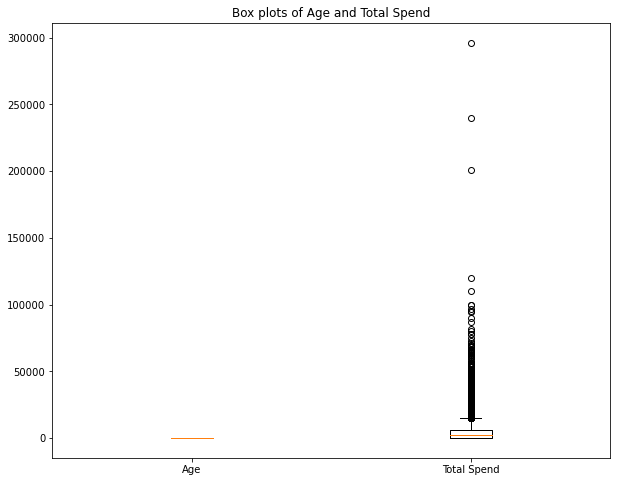

In [928]:
# Now we will check for the outliers present in the dataset
# We do not check for outliers in categorical variables

plt.figure(figsize=(10,8))
plt.boxplot(df[['Age','Total Spend']],labels=['Age','Total Spend'])
plt.title('Box plots of Age and Total Spend')
plt.show()

In [929]:
# outliers is present in Total Spend column

In [930]:
#Handling outliers in Total Spend column

q1=np.percentile(df['Total Spend'],25,interpolation='midpoint')
q2=np.percentile(df['Total Spend'],50,interpolation='midpoint')
q3=np.percentile(df['Total Spend'],75,interpolation='midpoint')

print('Quartile 1',q1)
print('Quartile 2',q2)
print('Quartile 3',q3)

iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr

print('Lower limit is ',lw, 'and Upper limit is ',up)

outlier=[]
for x in df['Total Spend']:
    if((x>up)or(x<lw)):
        outlier.append(x)
      
ind=(df['Total Spend']>up)|(df['Total Spend']<lw)
dt=df.loc[ind].index
df.drop(dt,inplace=True)

Quartile 1 0.01
Quartile 2 2000.0
Quartile 3 6000.0
Lower limit is  -8999.975 and Upper limit is  14999.985


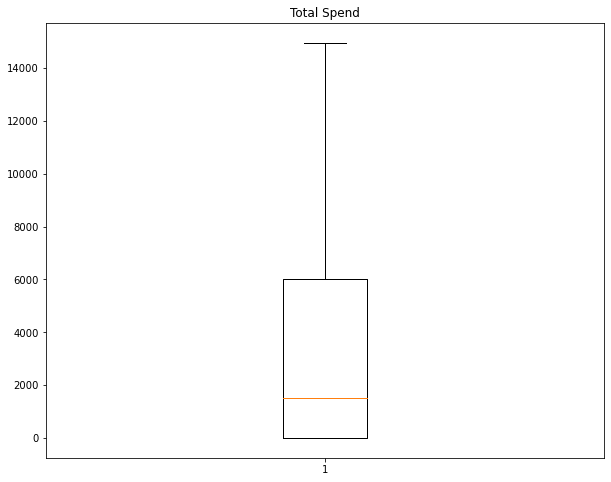

In [931]:
plt.figure(figsize=(10,8))
plt.boxplot(df['Total Spend'])
plt.title('Total Spend')
plt.show()

In [932]:
# Take a look at the new format dataset
df.shape

(20765, 15)

In [933]:
# Now we have removed all the outliers

In [934]:
# Checking unique values of some varibles

print('Gender',data['Gender'].unique())
print('Geographic Region',data['Geographic Region'].unique())
print('Loyalty Status',data['Loyalty Status'].unique())
print('Neighborhood Cluster-7 Level',data['Neighborhood Cluster-7 Level'].unique())
print('Television Region',data['Television Region'].unique())
print('Affluence Grade',data['Affluence Grade'].unique())
print('Age',data['Age'].unique())
print('Frequency Percent',data['Frequency Percent'].unique())
print('Loyalty Card Tenure',data['Loyalty Card Tenure'].unique())

Gender ['F' 'M']
Geographic Region ['Midlands' 'North' 'South East' 'Scottish' 'South West']
Loyalty Status ['Gold' 'Silver' 'Tin']
Neighborhood Cluster-7 Level ['D' 'F' 'A' 'C' 'B' 'E' 'U']
Television Region ['Wales & West' 'Midlands' 'East' 'N East' 'London' 'S & S East'
 'C Scotland' 'Ulster' 'N West' 'S West' 'Yorkshire' 'Border' 'N Scot']
Affluence Grade [ 4  5 10 11 13 14  7  9  6 16  8  3 15 12 19  2 17 18 20 22 26 25 24  1
 21 23 27 29 30 31  0 34 28]
Age [49. 70. 65. 68. 74. 62. 43. 60. 54. 51. 64. 37. 42. 66. 46. 39. 75. 72.
 79. 50. 35. 71. 44. 31. 41. 58. 47. 76. 61. 53. 57. 45. 55. 18. 56. 78.
 48. 67. 52. 34. 40. 38. 77. 27. 36. 59. 63. 26. 69. 33. 30. 29. 73. 32.
 22. 25. 28. 23. 20. 24. 19. 21.]
Frequency Percent ['0.00%']
Loyalty Card Tenure [ 5  8  7  3  1  2 11  9  4 12 23  6 19 24 10 29 17 18 13 32 27 22 15 30
 14 20 16 31 28 21 25 26  0 36 35 33 39 38 34]


In [935]:
# to check for the type of values in different attributes
df.dtypes

Customer Loyalty ID               int64
Gender                           object
Geographic Region                object
Loyalty Status                   object
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level     object
Television Region                object
Affluence Grade                   int64
Age                             float64
Frequency                         int64
Frequency Percent                object
Loyalty Card Tenure               int64
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

In [936]:
# Feature reduction

In [937]:
# Coorelation Matrix
df.corr()

,Customer Loyalty ID,Neigborhood Cluster-55 Level,Affluence Grade,Age,Frequency,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
Customer Loyalty ID,1.000000,-0.012472,0.001037,0.005103,NaN,0.003773,0.005423,0.006580,0.000140
Neigborhood Cluster-55 Level,-0.012472,1.000000,0.025628,-0.162431,NaN,-0.050253,0.063281,0.064110,-0.151515
Affluence Grade,0.001037,0.025628,1.000000,-0.133026,NaN,-0.032239,0.456356,0.352307,-0.039622
Age,0.005103,-0.162431,-0.133026,1.000000,NaN,0.202666,-0.297636,-0.294206,0.335755
Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loyalty Card Tenure,0.003773,-0.050253,-0.032239,0.202666,NaN,1.000000,-0.053684,-0.053881,0.016334
Organics Purchase Count,0.005423,0.063281,0.456356,-0.297636,NaN,-0.053684,1.000000,0.910970,-0.097950
Organics Purchase Indicator,0.006580,0.064110,0.352307,-0.294206,NaN,-0.053881,0.910970,1.000000,-0.096047
Total Spend,0.000140,-0.151515,-0.039622,0.335755,NaN,0.016334,-0.097950,-0.096047,1.000000


<AxesSubplot:>

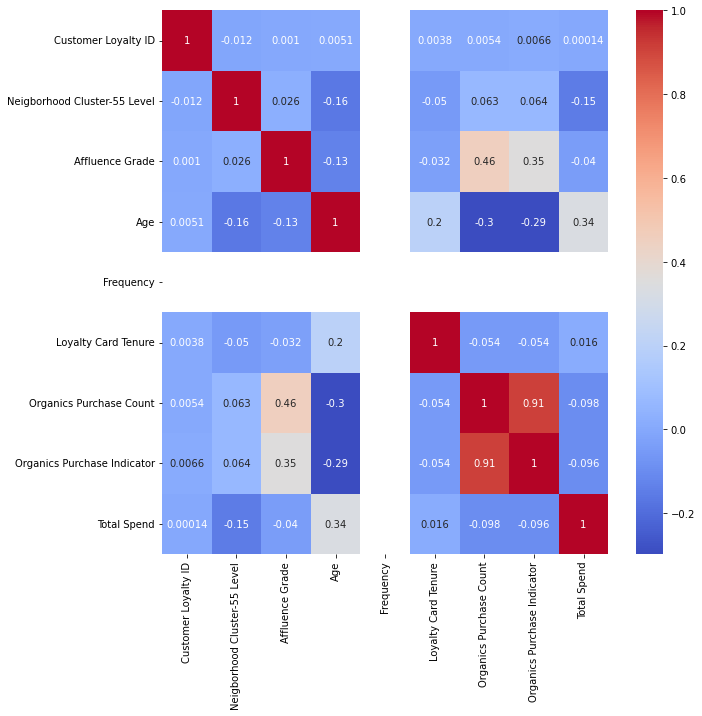

In [938]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [939]:
# Dropping columns with only 1 value since they doesn't contribute anything towards our analysis

df.drop(['Frequency','Frequency Percent'], axis=1, inplace=True)
df.head(10)

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
1,620,F,Midlands,Gold,35.0,D,Wales & West,4,49.0,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70.0,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65.0,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68.0,8,0,0,0.01
6,3131,F,Midlands,Tin,3.0,A,East,11,74.0,8,0,0,0.01
7,3328,M,North,Tin,32.0,D,N East,13,62.0,5,0,0,0.01
8,4529,M,Midlands,Silver,49.0,F,East,10,62.0,3,0,0,2038.76
9,5886,F,South East,Gold,49.0,F,London,14,43.0,1,1,1,6000.00
10,7420,F,North,Gold,52.0,F,N East,7,60.0,2,0,0,11000.00
11,9814,M,South East,Silver,24.0,C,London,5,54.0,1,1,1,5000.00


In [940]:
#Exploratory Data Analysis

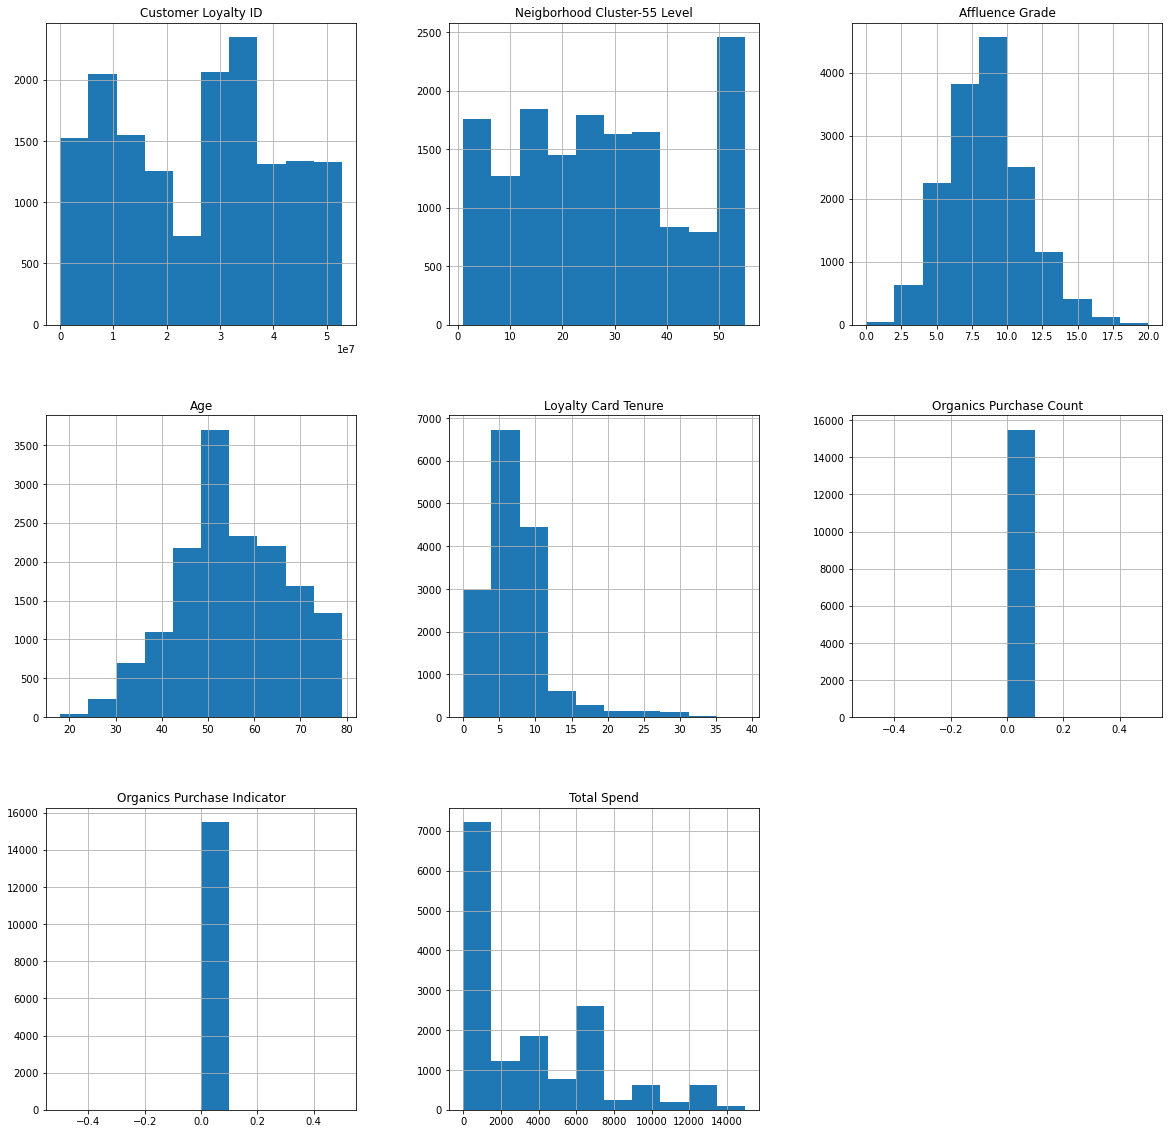

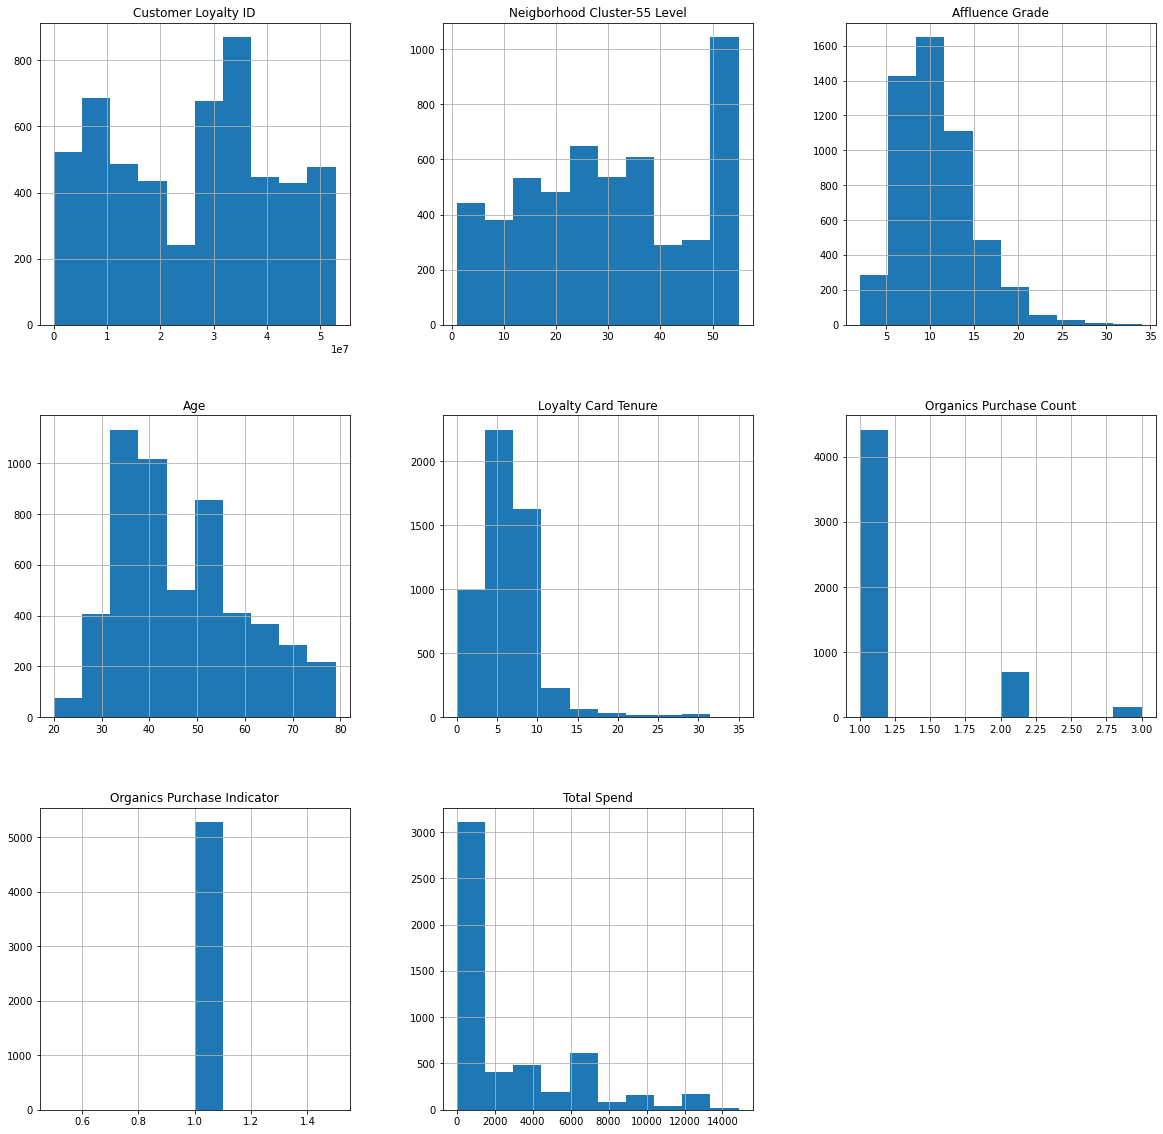

In [941]:
#univariate
# histograms
df.groupby('Organics Purchase Indicator').hist(figsize=(20,20))
plt.show()
plt.close()

In [942]:
#Insight: From the above histograms based on thr dataset we can find that:
#1.'Neigborhood Cluster-55 Level' within 50-55 range has highest organic purchasers.
#2.'Affluence Grade' between 8-10 has highest organic purchasers.
#3.'Age' in the range 48-55 has highest organic purchasers.
#4.'Loyalty Card Tenure' with 4-8 years has highest organic purchasers.
#5.'Total spend' within 0-1500 has highest organic purchasers.

Text(0, 0.5, 'Count')

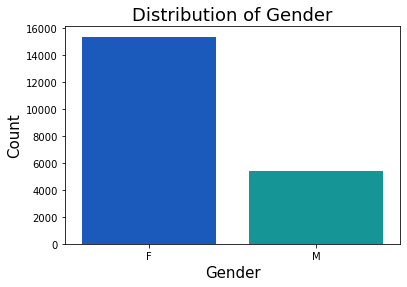

In [943]:
sns.countplot(data=df,x="Gender",palette="winter")
plt.title("Distribution of Gender",size=18)
plt.xlabel("Gender",size=15)
plt.ylabel("Count",size=15)

In [944]:
#Insight: we can find that the count of females is very high compared to males in this dataset.

Text(0, 0.5, 'Count')

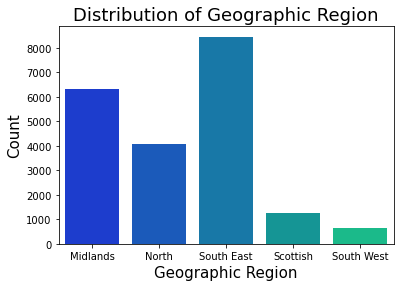

In [945]:
sns.countplot(data=df,x="Geographic Region",palette="winter")
plt.title("Distribution of Geographic Region",size=18)
plt.xlabel("Geographic Region",size=15)
plt.ylabel("Count",size=15)

In [946]:
#Insight: we can find that in this dataset, South east has the highest count followed by Midlands followed by North followed by Scottish followed by  South west in this order respectively.

Text(0, 0.5, 'Count')

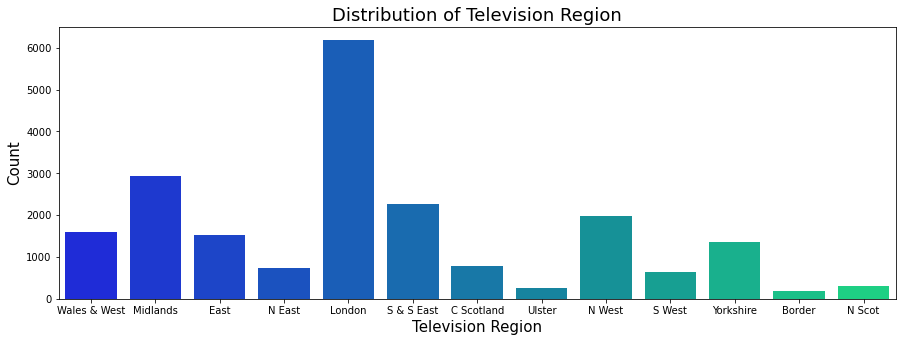

In [947]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="Television Region",palette="winter")
plt.title("Distribution of Television Region",size=18)
plt.xlabel("Television Region",size=15)
plt.ylabel("Count",size=15)

In [948]:
#Insight: we can find that count of television region London is the highest in this dataset.

Text(0, 0.5, 'Count')

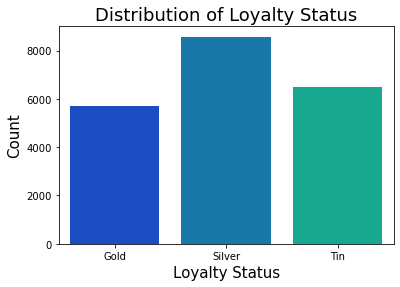

In [949]:
sns.countplot(data=df,x="Loyalty Status",palette="winter")
plt.title("Distribution of Loyalty Status",size=18)
plt.xlabel("Loyalty Status",size=15)
plt.ylabel("Count",size=15)

In [950]:
#Insight: we can find that count of Silver Loyalty card is the highest in this dataset followed by tin and then gold.

<AxesSubplot:xlabel='Gender', ylabel='Organics Purchase Count'>

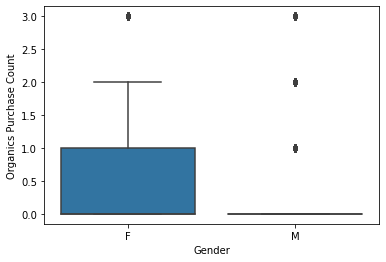

In [951]:
#bivariate
sns.boxplot(x=df['Gender'], y=df['Organics Purchase Count'])

In [952]:
#Insight : This indicates that females have purchased the organics more often

In [953]:
# Encoding
# Get dummy variables for all categorical columns
df1 = pd.get_dummies(data=df, columns=['Gender','Geographic Region','Loyalty Status',
                                        'Neighborhood Cluster-7 Level','Television Region'])

In [954]:
# to display the first 10 rows of modified dataset
df1.head(10)

,Customer Loyalty ID,Neigborhood Cluster-55 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend,Gender_F,Gender_M,...,Television Region_London,Television Region_Midlands,Television Region_N East,Television Region_N Scot,Television Region_N West,Television Region_S & S East,Television Region_S West,Television Region_Ulster,Television Region_Wales & West,Television Region_Yorkshire
1,620,35.0,4,49.0,5,0,0,6000.00,1,0,...,0,0,0,0,0,0,0,0,1,0
2,868,27.0,5,70.0,8,1,1,0.02,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1120,51.0,10,65.0,7,1,1,0.01,0,1,...,0,1,0,0,0,0,0,0,0,0
4,2313,4.0,11,68.0,8,0,0,0.01,1,0,...,0,1,0,0,0,0,0,0,0,0
6,3131,3.0,11,74.0,8,0,0,0.01,1,0,...,0,0,0,0,0,0,0,0,0,0
7,3328,32.0,13,62.0,5,0,0,0.01,0,1,...,0,0,1,0,0,0,0,0,0,0
8,4529,49.0,10,62.0,3,0,0,2038.76,0,1,...,0,0,0,0,0,0,0,0,0,0
9,5886,49.0,14,43.0,1,1,1,6000.00,1,0,...,1,0,0,0,0,0,0,0,0,0
10,7420,52.0,7,60.0,2,0,0,11000.00,1,0,...,0,0,1,0,0,0,0,0,0,0
11,9814,24.0,5,54.0,1,1,1,5000.00,0,1,...,1,0,0,0,0,0,0,0,0,0


In [955]:
# to display the shape of the modified dataset
df1.shape

(20765, 38)

In [956]:
# to display all the column names in the modified dataset
df1.columns

Index(['Customer Loyalty ID', 'Neigborhood Cluster-55 Level',
       'Affluence Grade', 'Age', 'Loyalty Card Tenure',
       'Organics Purchase Count', 'Organics Purchase Indicator', 'Total Spend',
       'Gender_F', 'Gender_M', 'Geographic Region_Midlands',
       'Geographic Region_North', 'Geographic Region_Scottish',
       'Geographic Region_South East', 'Geographic Region_South West',
       'Loyalty Status_Gold', 'Loyalty Status_Silver', 'Loyalty Status_Tin',
       'Neighborhood Cluster-7 Level_A', 'Neighborhood Cluster-7 Level_B',
       'Neighborhood Cluster-7 Level_C', 'Neighborhood Cluster-7 Level_D',
       'Neighborhood Cluster-7 Level_E', 'Neighborhood Cluster-7 Level_F',
       'Neighborhood Cluster-7 Level_U', 'Television Region_Border',
       'Television Region_C Scotland', 'Television Region_East',
       'Television Region_London', 'Television Region_Midlands',
       'Television Region_N East', 'Television Region_N Scot',
       'Television Region_N West', 'Televi

In [957]:
#Standardization

In [958]:
# Standard scaling
# to check for the basic statistic description of data
df1.describe()

,Customer Loyalty ID,Neigborhood Cluster-55 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend,Gender_F,Gender_M,...,Television Region_London,Television Region_Midlands,Television Region_N East,Television Region_N Scot,Television Region_N West,Television Region_S & S East,Television Region_S West,Television Region_Ulster,Television Region_Wales & West,Television Region_Yorkshire
count,2.076500e+04,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,...,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000
mean,2.600933e+07,28.168649,8.690537,53.276475,6.511919,0.303010,0.253889,2984.740643,0.739995,0.260005,...,0.298001,0.141584,0.035252,0.014399,0.095834,0.109511,0.030532,0.012088,0.077005,0.065591
std,1.507737e+07,16.059763,3.360761,12.713160,4.554547,0.570221,0.435245,3519.671187,0.438647,0.438647,...,0.457391,0.348632,0.184420,0.119133,0.294371,0.312287,0.172050,0.109280,0.266605,0.247572
min,6.200000e+02,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.166346e+07,14.000000,6.000000,44.000000,4.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.870208e+07,27.000000,8.000000,54.000000,5.000000,0.000000,0.000000,1500.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.740218e+07,42.000000,10.000000,63.000000,8.000000,1.000000,1.000000,6000.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.285647e+07,55.000000,34.000000,79.000000,39.000000,3.000000,1.000000,14961.520000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [959]:
# to check for the type of data
type(df1)

pandas.core.frame.DataFrame

In [960]:
from sklearn import preprocessing

min_max = preprocessing.MinMaxScaler()
for i in ['Customer Loyalty ID', 'Neigborhood Cluster-55 Level',
       'Affluence Grade', 'Age', 'Loyalty Card Tenure',
       'Organics Purchase Count', 'Organics Purchase Indicator', 'Total Spend',
       'Gender_F', 'Gender_M', 'Geographic Region_Midlands',
       'Geographic Region_North', 'Geographic Region_Scottish',
       'Geographic Region_South East', 'Geographic Region_South West',
       'Loyalty Status_Gold', 'Loyalty Status_Silver', 'Loyalty Status_Tin',
       'Neighborhood Cluster-7 Level_A', 'Neighborhood Cluster-7 Level_B',
       'Neighborhood Cluster-7 Level_C', 'Neighborhood Cluster-7 Level_D',
       'Neighborhood Cluster-7 Level_E', 'Neighborhood Cluster-7 Level_F',
       'Neighborhood Cluster-7 Level_U', 'Television Region_Border',
       'Television Region_C Scotland', 'Television Region_East',
       'Television Region_London', 'Television Region_Midlands',
       'Television Region_N East', 'Television Region_N Scot',
       'Television Region_N West', 'Television Region_S & S East',
       'Television Region_S West', 'Television Region_Ulster',
       'Television Region_Wales & West', 'Television Region_Yorkshire']:
    df1[[i]] = min_max.fit_transform(df1[[i]])

In [961]:
df1.head(10)

,Customer Loyalty ID,Neigborhood Cluster-55 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend,Gender_F,Gender_M,...,Television Region_London,Television Region_Midlands,Television Region_N East,Television Region_N Scot,Television Region_N West,Television Region_S & S East,Television Region_S West,Television Region_Ulster,Television Region_Wales & West,Television Region_Yorkshire
1,0.000000,0.629630,0.117647,0.508197,0.128205,0.000000,0.0,4.010284e-01,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000005,0.481481,0.147059,0.852459,0.205128,0.333333,1.0,6.683817e-07,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000009,0.925926,0.294118,0.770492,0.179487,0.333333,1.0,0.000000e+00,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000032,0.055556,0.323529,0.819672,0.205128,0.000000,0.0,0.000000e+00,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000048,0.037037,0.323529,0.918033,0.205128,0.000000,0.0,0.000000e+00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000051,0.574074,0.382353,0.721311,0.128205,0.000000,0.0,0.000000e+00,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000074,0.888889,0.294118,0.721311,0.076923,0.000000,0.0,1.362663e-01,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000100,0.888889,0.411765,0.409836,0.025641,0.333333,1.0,4.010284e-01,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.000129,0.944444,0.205882,0.688525,0.051282,0.000000,0.0,7.352192e-01,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.000174,0.425926,0.147059,0.590164,0.025641,0.333333,1.0,3.341902e-01,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [962]:
df1.describe()

,Customer Loyalty ID,Neigborhood Cluster-55 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend,Gender_F,Gender_M,...,Television Region_London,Television Region_Midlands,Television Region_N East,Television Region_N Scot,Television Region_N West,Television Region_S & S East,Television Region_S West,Television Region_Ulster,Television Region_Wales & West,Television Region_Yorkshire
count,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,...,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000,20765.000000
mean,0.492069,0.503123,0.255604,0.578303,0.166972,0.101003,0.253889,0.199494,0.739995,0.260005,...,0.298001,0.141584,0.035252,0.014399,0.095834,0.109511,0.030532,0.012088,0.077005,0.065591
std,0.285254,0.297403,0.098846,0.208412,0.116783,0.190074,0.435245,0.235248,0.438647,0.438647,...,0.457391,0.348632,0.184420,0.119133,0.294371,0.312287,0.172050,0.109280,0.266605,0.247572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220654,0.240741,0.176471,0.426230,0.102564,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.543014,0.481481,0.235294,0.590164,0.128205,0.000000,0.000000,0.100257,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.707614,0.759259,0.294118,0.737705,0.205128,0.333333,1.000000,0.401028,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [963]:
#Feature Engineering

In [964]:
#Selecting the most relevant features used for predictive modeling

y = df1['Organics Purchase Indicator']
x = df1.drop(['Customer Loyalty ID', 'Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level_A', 'Neighborhood Cluster-7 Level_B',
       'Neighborhood Cluster-7 Level_C', 'Neighborhood Cluster-7 Level_D',
       'Neighborhood Cluster-7 Level_E', 'Neighborhood Cluster-7 Level_F',
       'Neighborhood Cluster-7 Level_U'], axis=1)
x.sample(5)

,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend,Gender_F,Gender_M,Geographic Region_Midlands,Geographic Region_North,...,Television Region_London,Television Region_Midlands,Television Region_N East,Television Region_N Scot,Television Region_N West,Television Region_S & S East,Television Region_S West,Television Region_Ulster,Television Region_Wales & West,Television Region_Yorkshire
9410,0.235294,0.590164,0.282051,0.333333,1.0,0.100257,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19867,0.147059,0.704918,0.230769,0.000000,0.0,0.457223,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2346,0.264706,0.934426,0.307692,0.000000,0.0,0.300771,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21384,0.088235,0.295082,0.205128,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,0.205882,0.868852,0.076923,0.333333,1.0,0.133676,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [965]:
#Predictive Modeling

In [966]:
#Importing train_test_split from the sklearn.model_selection library and splitting the data, by keeping 75% of the data in train dataset and the rest 25% in test dataset

In [967]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [968]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [969]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('Y_train',y_train.shape)
print('Y_test',y_test.shape)

X_train (15573, 29)
X_test (5192, 29)
Y_train (15573,)
Y_test (5192,)


In [970]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [971]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [972]:
confusion_matrix(y_test,y_pred)

array([[3867,    0],
       [   0, 1325]], dtype=int64)

In [973]:
# using logistic regression we got f1 score of 100%

In [974]:
# KNN - k-nearest neighbours

from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

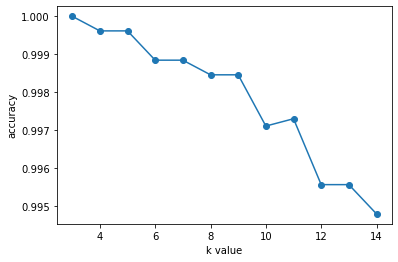

In [975]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [976]:
# we will take the k value as 5

In [977]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [978]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9996147919876733
precision score: 0.9997415352804342
recall_score: 0.999245283018868
f1 score: 0.9994930907250443


In [979]:
confusion_matrix(y_test,y_pred)

array([[3867,    0],
       [   2, 1323]], dtype=int64)

In [980]:
y_test.value_counts()

0.0    3867
1.0    1325
Name: Organics Purchase Indicator, dtype: int64

In [981]:
#we are getting an accuracy of 99%

In [982]:
#Decision tree

In [983]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [984]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [985]:
confusion_matrix(y_test,y_pred)

array([[3867,    0],
       [   0, 1325]], dtype=int64)

In [986]:
# accuracy score of 100%

In [987]:
#SVM

In [988]:
#linear classifier

In [989]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [990]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [991]:
#polynomial SVM

In [992]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [993]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [994]:
#Radial SVM

In [995]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [996]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [997]:
#RandomForest Classifier

In [998]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [999]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [1000]:
confusion_matrix(y_test,y_pred)

array([[3867,    0],
       [   0, 1325]], dtype=int64)

In [1001]:
#fine tuning of hyper parameters

In [1002]:
rft=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')

In [1003]:
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [1004]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [1005]:
# getting the same accuracy score

In [1006]:
# gradient boosting

In [1007]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [1008]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [1009]:
#Standardizing the features

In [1010]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [1011]:
#logistic Regression after standardization

In [1012]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [1013]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [1014]:
##RandomForest Classifier after standardization

In [1015]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [1016]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [1017]:
# SVC after standardization

In [1018]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [1019]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [1020]:
# Decision tree after standardization

In [1021]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [1022]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 1.0
precision score: 1.0
recall_score: 1.0
f1 score: 1.0


In [1023]:
# KNN - k-nearest neighbours after standardization

In [1024]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [1025]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9973035439137135
precision score: 0.9981963411491883
recall_score: 0.9947169811320755
f1 score: 0.9964410023478574


In [1026]:
#Fine Tuning

In [1027]:
#Using Entropy Criterion

In [1028]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

In [1030]:
#Evaluating the Model

In [1031]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(x_test)))

In [1032]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 1.0
Test Accuracy : 1.0


In [1034]:
#Using GridSearchCV

In [1035]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [1036]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038002,0.000000,0.003502,0.000499,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.038753,0.002774,0.003250,0.000432,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.040502,0.004091,0.003003,0.000708,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.038253,0.007496,0.002748,0.000434,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.039997,0.002736,0.002750,0.000433,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1


In [1037]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038002,0.000000,0.003502,0.000499,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.038753,0.002774,0.003250,0.000432,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.040502,0.004091,0.003003,0.000708,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.038253,0.007496,0.002748,0.000434,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.039997,0.002736,0.002750,0.000433,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,1.0,1.0,1.0,0.0,1


In [1038]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

In [1040]:
dt_best = grid_search.best_estimator_

In [1042]:
#Evaluating the Model with Best Estimator Parameters

In [1043]:
evaluate_model(dt_best)

Train Accuracy : 1.0
Test Accuracy : 1.0


In [ ]:
#Classification Report

In [1044]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87      3867
         1.0       1.00      0.16      0.27      1325

    accuracy                           0.79      5192
   macro avg       0.89      0.58      0.57      5192
weighted avg       0.83      0.79      0.72      5192



In [ ]:
Conclusion
As we can see 'Gender', 'Age', 'Affluence Grade' and 'Loyalty Status' are important features in this dataset.
Age between 31 and 40 year old, female, Affluence Grade below 10 and Tin Loyalty Status are the majority contribution to the contributer.
Suggest to focus on this group of customer and bundle to those products that this group of customer used to buy. And also displaying organics products with those products that this group of customer used to buy.